# Analyze bookstore sales with Python

My mission here for Lapage is to analyse the strengths, weaknesses and customer behavior of Lapage.

I was also asked to ...
 <br></br>
 
<u> Summary</u> :

 Tools [(here)](#another_cell_0)

 I. Explore and clean <a href="https://github.com/donia-nefiz/Analyze-bookstore-sales-with-Python" target="_blank">Lapage data</a>
     <br>*1. [customers.csv](http://localhost:8888/edit/customers.csv) : exploration and data cleaning [(here)](#another_cell_a)*</br>
     <br>*2. [products.csv](http://localhost:8888/edit/products.csv) : exploration and data cleaning [(here)](#another_cell_b)*</br>
     <br>*3. [transactions.csv](http://localhost:8888/edit/transactions.csv) : exploration and data cleaning [(here)](#another_cell_c)</br>*
     <br>*4. Merge Lapage dataframes, explore and clean [(here)](#another_cell_d)</br>*


II. Sales indicators analysis
    <br>*1. Total sales</br>*
    <br>*-- a. Total sales by product category [(here)](#another_cell_e)</br>*
    <br>*-- b. Total sales by age group [(here)](#another_cell_f)</br>*
    <br>*-- c. Total sales by period [(here)](#another_cell_g)</br>*
    <br>*2. ...</br>*
    <br>*-- a. ... [(here)](#another_cell_i)</br>*
    <br>*-- b. ... [(here)](#another_cell_j)</br>*
<br></br>   

## I. Lapage data, files exploration and data cleaning

<a id='another_cell_0'></a>

### Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

In [2]:
#Check null values function :
def check_nan(data, column):
    if len(data[data[column].isnull()]) == 0:
        print ("The column", column, "does not contain any missing values")
    else :
        print("The column", column, "contain ", len(data[data[column].isnull()]), " missing values")

In [3]:
#Check duplicates function :
def check_duplicates(data, column):
    n = len(data.index)
    if len(data[column].drop_duplicates()) == n :
        print ("The column", column, "does not contain duplicates")
    else :
        print("The column", column, "contains ", len(data[data[column].duplicated()]), " duplicates.")
        return data[data[column].duplicated()]

<a id='another_cell_a'></a>

### 1. [customers.csv](http://localhost:8888/edit/customers.csv) : exploration and data cleaning

- Loading file:

In [4]:
customers = pd.read_csv('customers.csv', sep=';')

- First 5 rows display :

In [5]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


- Number of rows and columns :

In [6]:
customers.shape

(8623, 3)

- .info display :

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


- Check null and duplicates values :

In [8]:
check_nan(customers, "client_id")
check_duplicates(customers, "client_id")

The column client_id does not contain any missing values
The column client_id does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Customers data give information on Lapage clients : their id (primary key), sex and year of birth</br></li>
<li> There are 8623 online customers over the past two years</li>
<li> The data file does not contain any missing value or duplicates</li>
<li> The primary key 'client_id' seems to start with c_xxxx</li>
</i></div>

- Check client ids format :

In [9]:
customers[~customers["client_id"].str.startswith("c_")]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> The clients ct_0 and ct_1 have different ids format</br></li>
</i></div>

- Add a new column "customer's age" :

In [10]:
customers['age'] = dt.date.today().year - customers['birth']
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


- Customer age distribution ;

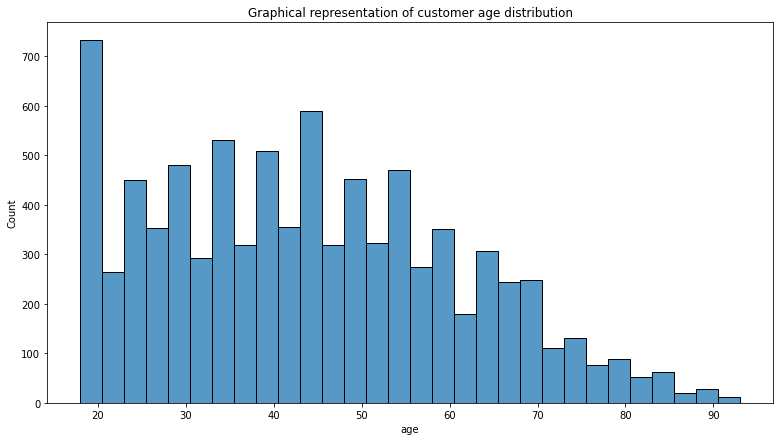

Age min: 18
Age max: 93


In [11]:
plt.figure(figsize=(13,7))
sns.histplot(customers["age"])
plt.title("Graphical representation of customer age distribution")
plt.show()

print("Age min:",customers["age"].min())
print("Age max:",customers["age"].max())

<div class="alert-success">
    <u>Notice</u> :
<i><br><li> The age of the customers is distributed between 18 and 93 years old</br></li>
<li> The number of 18-year-olds (minimum age) is very high</li>
</i></div>

- Customer male/female distribution : 

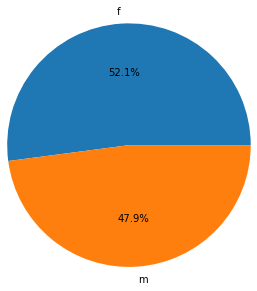

In [12]:
customers["sex"].value_counts().plot(kind="pie", autopct='%.1f%%', ylabel='', radius=1.4)
plt.show()

<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Customers are almost as many men as women</br></li>
</i></div>

 <a id='another_cell_b'></a>


### 2. [products.csv](http://localhost:8888/edit/products.csv) : exploration and data cleaning

- Loading file:

In [13]:
products = pd.read_csv('products.csv', sep=';')

- First 5 rows display :

In [14]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


- Number of rows and columns :

In [15]:
products.shape

(3287, 3)

- .info display :

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


- Check missing and duplicate values :

In [17]:
check_nan(products, "id_prod")
check_duplicates(products,"id_prod")

The column id_prod does not contain any missing values
The column id_prod does not contain duplicates


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Products data give information on Lapage products : their id (primary key), price (the only quantitative data in this df) and category</br></li>
<li> There are 3287 products</li>
<li> The data file does not contain any missing value or duplicates</li>
<li> The primary key 'id_prod' seems to start with "categ_xxxx"</li>
</i></div>

- Check negative values on price and delete it :

In [18]:
products[products["price"]<0]

,id_prod,price,categ
731,T_0,-1.0,0


In [19]:
products = products.drop([731]).reset_index(drop=True)

<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> The client T_0 has a negative price, it must be a test product, so we chose to delete this value</br></li>
</i></div>

- Category distribution :

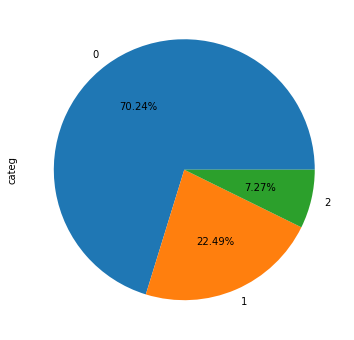

In [20]:
plt.figure(figsize=(13,7))
products['categ'] = pd.Categorical(products['categ']) #we convert the variable to the correct format
products["categ"].value_counts().plot(kind="pie", autopct='%1.2f%%', figsize=(9,6))
plt.show();

<div class="alert-success">
    <u>Notice</u> :
<i><br><li> There are 3 categories of products : 0,1 and 2</br></li>
<i><li> Products are distributed in 3 categories and 2/3 of them are in the category 0</li>
</i></div>

- Price variable :

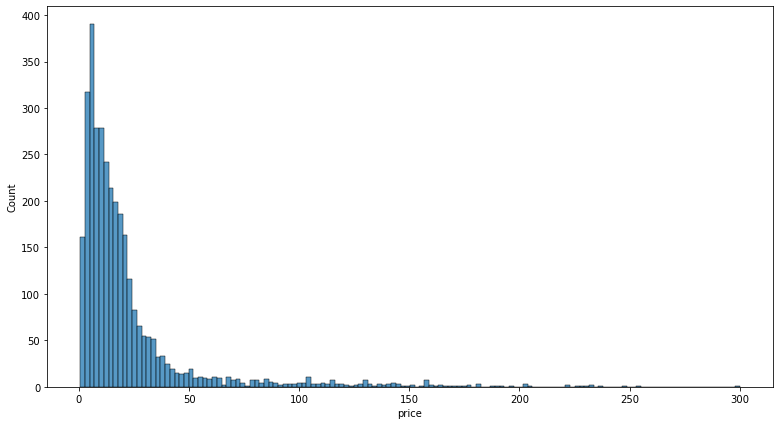

,count,mean,std,min,25%,50%,75%,max
price,3286.0,21.863597,29.849786,0.62,6.99,13.075,22.99,300.0


In [21]:
plt.figure(figsize=(13,7))
sns.histplot(data =products, x="price" )
plt.show();

display(products.describe().T)

<div class="alert-success">
    <u>Notice</u> :
<i><br><li> The average price is 21.86 euros</br></li>
<i><li> 50% of the prices are below 13.06 euros with a maximum price of 300 euros</li>
<i><li> We have a spready distribution on the right with a standard deviation of 29.84 euros and certainly outliers</li>
</i></div>

- Outliers on the variable price : 

---------------------------------------------------------------------------------------------------- 



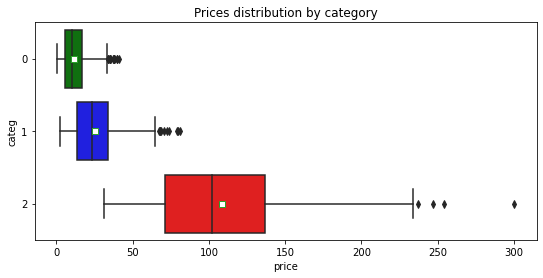

---------------------------------------------------------------------------------------------------- 



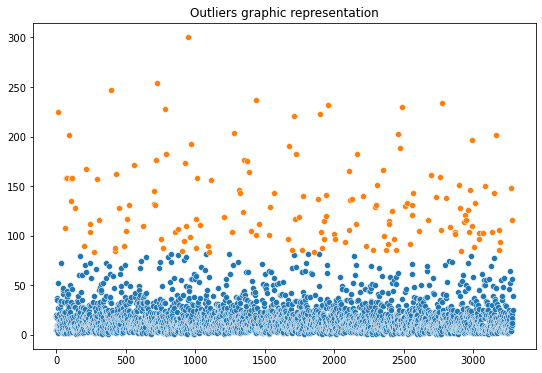

---------------------------------------------------------------------------------------------------- 



,id_prod,price,categ,zscore
10,2_228,225.17,2,6.810984
64,2_89,107.99,2,2.885327
73,2_225,157.99,2,4.560381
79,2_187,157.99,2,4.560381
95,2_128,201.74,2,6.026053
...,...,...,...,...
3183,2_142,105.24,2,2.793199
3187,2_99,84.99,2,2.114803
3195,2_238,93.92,2,2.413967
3270,2_123,147.99,2,4.225370


In [22]:
print('-'*100, "\n")
plt.figure(figsize=(9,4))
palette = ['g','b','r']
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(data=products, y='categ', x='price', orient='h', showmeans=True, palette=palette, meanprops=meanprops)
plt.title('Prices distribution by category');
plt.show()

outliers = products.copy()
outliers["zscore"] = (outliers["price"] - outliers["price"].mean())/outliers["price"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["price"].index, y=the_ok["price"].values,)
sns.scatterplot(x=the_outliers["price"].index, y=the_outliers["price"].values)
plt.title('Outliers graphic representation');
plt.show()
print('-'*100, "\n")
display(the_outliers)

<div class="alert-warning">
    <u>Warning</u> :
<i><br><li> Number of outliers detected : 157</br></li>
</i></div>

  <a id='another_cell_c'></a>

### 3. [transactions.csv](http://localhost:8888/edit/transactions.csv) : exploration and data cleaning


- Loading file:

In [23]:
transactions = pd.read_csv('transactions.csv', sep=';')

- First 5 rows display :

In [24]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


- Number of rows and columns :

In [25]:
transactions.shape

(679532, 4)

- .info display :

In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


<div class="alert-success">
    <u>Notice</u> :
<i><br><li> Dataframe transactions provides information about sales transactions : it links the df products and customers using "id_prod" and "client_id" foreign keys</br></li>
<i><li> There are 4 variables in the dataset : each line represents a sale transaction on a given date</li>
<i><li> There are 679,532 transactions recorded</li>
<li> The data file does not contain any missing value</li>
</i></div>

- Check and delete duplicates on df :

In [27]:
doublons = transactions[transactions.duplicated()]
doublons

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [28]:
print("Duplicates relate to products :", doublons["id_prod"].unique())
print('-'*100, "\n")
print("Duplicates relate to clients :", doublons["client_id"].unique())
print('-'*100, "\n")
print("Duplicates relate to dates :", doublons["date"].str.split(".", expand=True)[0].unique())
print('-'*100, "\n")
print("Duplicates relate to sessions :", doublons["session_id"].str.split(".", expand=True)[0].unique())

Duplicates relate to products : ['T_0']
---------------------------------------------------------------------------------------------------- 

Duplicates relate to clients : ['ct_1' 'ct_0']
---------------------------------------------------------------------------------------------------- 

Duplicates relate to dates : ['test_2021-03-01 02:30:02']
---------------------------------------------------------------------------------------------------- 

Duplicates relate to sessions : ['s_0']


<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> Clients ct_1 and ct_0 are test clients who made transactions on a test product (T_0) on a test date ('test_2021-03-01 02:30:02') during a test session (s_0)</br></li>
</i></div>

In [29]:
transactions_test = transactions[transactions["id_prod"] =="T_0"]
print("There are", len(transactions_test), "tests transactions")

There are 200 tests transactions


In [30]:
transactions = transactions[transactions["id_prod"] !="T_0"]
transactions.shape

(679332, 4)

<div class="alert-success">
    <u>Notice</u> :
<i><br><li> After cleaning, there are 679,332 transactions in the file</br></li>
</i></div>

- Split date, time and year in the df :

In [31]:
transactions['date'] = pd.to_datetime(transactions['date']).dt.date
transactions['year'] = pd.to_datetime(transactions['date']).dt.year
transactions['time'] = pd.to_datetime(transactions['date']).dt.time
transactions['date'] = pd.to_datetime(transactions['date'])#date convertion
transactions

,id_prod,date,session_id,client_id,year,time
0,0_1518,2022-05-20,s_211425,c_103,2022,00:00:00
1,1_251,2022-02-02,s_158752,c_8534,2022,00:00:00
2,0_1277,2022-06-18,s_225667,c_6714,2022,00:00:00
3,2_209,2021-06-24,s_52962,c_6941,2021,00:00:00
4,0_1509,2023-01-11,s_325227,c_4232,2023,00:00:00
...,...,...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489,2022,00:00:00
679528,1_639,2022-03-19,s_181434,c_4370,2022,00:00:00
679529,0_1425,2022-12-20,s_314704,c_304,2022,00:00:00
679530,0_1994,2021-07-16,s_63204,c_2227,2021,00:00:00


- Add a new column "period" :

In [32]:
transactions['period'] = transactions['date'].dt.to_period("m")
transactions

,id_prod,date,session_id,client_id,year,time,period
0,0_1518,2022-05-20,s_211425,c_103,2022,00:00:00,2022-05
1,1_251,2022-02-02,s_158752,c_8534,2022,00:00:00,2022-02
2,0_1277,2022-06-18,s_225667,c_6714,2022,00:00:00,2022-06
3,2_209,2021-06-24,s_52962,c_6941,2021,00:00:00,2021-06
4,0_1509,2023-01-11,s_325227,c_4232,2023,00:00:00,2023-01
...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489,2022,00:00:00,2022-01
679528,1_639,2022-03-19,s_181434,c_4370,2022,00:00:00,2022-03
679529,0_1425,2022-12-20,s_314704,c_304,2022,00:00:00,2022-12
679530,0_1994,2021-07-16,s_63204,c_2227,2021,00:00:00,2021-07


- Online sales graphical representation from 2021 to 2023 :

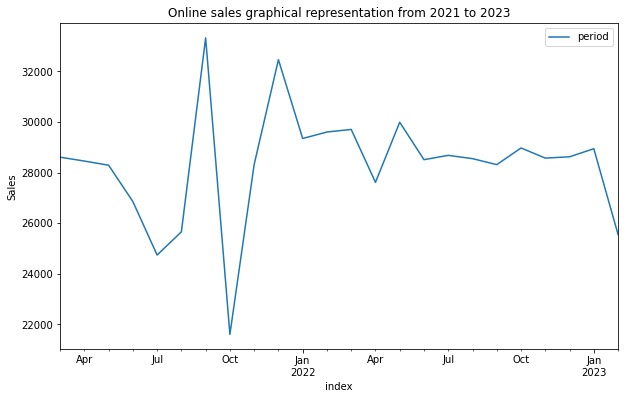

In [33]:
transactions["period"].value_counts().reset_index().set_index('index').sort_values("index").plot( figsize=(10,6))
plt.ylabel("Sales")
plt.title("Online sales graphical representation from 2021 to 2023");

<a id='another_cell_d'></a>

### 4. Merge Lapage dataframes, explore and clean

- Merge dataframes :

In [34]:
lapage_df = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod')
display(lapage_df.head())

,id_prod,date,session_id,client_id,year,time,period,sex,birth,age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,2022,00:00:00,2022-05,f,1986,36,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,2022,00:00:00,2022-02,m,1988,34,15.99,1
2,0_1277,2022-06-18,s_225667,c_6714,2022,00:00:00,2022-06,f,1968,54,7.99,0
3,2_209,2021-06-24,s_52962,c_6941,2021,00:00:00,2021-06,m,2000,22,69.99,2
4,0_1509,2023-01-11,s_325227,c_4232,2023,00:00:00,2023-01,m,1980,42,4.99,0


- Explore the final result :

In [35]:
lapage_df.shape

(679332, 12)

In [36]:
lapage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   year        679332 non-null  int64         
 5   time        679332 non-null  object        
 6   period      679332 non-null  period[M]     
 7   sex         679332 non-null  object        
 8   birth       679332 non-null  int64         
 9   age         679332 non-null  int64         
 10  price       679111 non-null  float64       
 11  categ       679111 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(5), period[M](1)
memory usage: 62.8+ MB


<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> Columns "price" and "categ" have missing values</br></li>
</i></div>

In [37]:
check_nan(lapage_df, "price")
check_nan(lapage_df, "categ")

The column price contain  221  missing values
The column categ contain  221  missing values


- Check mask values :

In [38]:
mask_nan = (lapage_df['price'].isnull()) | (lapage_df['categ'].isnull())
print("Missing values concern those products :", lapage_df[mask_nan]["id_prod"].unique())

Missing values concern those products : ['0_2245']


- Check id_prod '0_2245' in products df :

In [39]:
products[products["id_prod"]=="0_2245" ]

,id_prod,price,categ


<div class="alert-danger">
    <u>Danger</u> :
<i><br><li> The product '0_2245' is not listed in products df</br></li>
<i><li> The product '0_2245' was saled 221 times</li>
<i><li> The product '0_2245' starts with 0_xxxx, so it belongs to the category 0</li>
<i><li> We must keep this product in the final result and assign it an average price: the category 0's one</li>
</i></div>

- Clean the final result : 

In [40]:
categ_0_mean = round(lapage_df[lapage_df["categ"]==0]["price"].mean(),2)#categ 0 average price

lapage_df.loc[lapage_df["id_prod"]=="0_2245", "price"] = categ_0_mean#categ 0 average price inputation

lapage_df.loc[lapage_df["id_prod"]=="0_2245", "categ"] = 0#categ 0 inputation on categ

lapage_df[lapage_df["id_prod"]=="0_2245"].head()#final chek

,id_prod,date,session_id,client_id,year,time,period,sex,birth,age,price,categ
2633,0_2245,2022-09-23,s_272266,c_4746,2022,00:00:00,2022-09,m,1940,82,10.64,0
10103,0_2245,2022-07-23,s_242482,c_6713,2022,00:00:00,2022-07,f,1963,59,10.64,0
11723,0_2245,2022-12-03,s_306338,c_5108,2022,00:00:00,2022-12,m,1978,44,10.64,0
15670,0_2245,2021-08-16,s_76493,c_1391,2021,00:00:00,2021-08,m,1991,31,10.64,0
16372,0_2245,2022-07-16,s_239078,c_7954,2022,00:00:00,2022-07,m,1973,49,10.64,0


In [41]:
lapage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   year        679332 non-null  int64         
 5   time        679332 non-null  object        
 6   period      679332 non-null  period[M]     
 7   sex         679332 non-null  object        
 8   birth       679332 non-null  int64         
 9   age         679332 non-null  int64         
 10  price       679332 non-null  float64       
 11  categ       679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(5), period[M](1)
memory usage: 62.8+ MB


<div class="alert-success">
    <u>Conclusion</u> :
<i><br><li> There are 679,332 transactions in the final dataframe :</br></li>
<i>----> The test product T_0 has been deleted (200 lines)</i>
<i><br>----> The missing price of product 0_2245 has been updated by the category 0's products average price (221 lines)</br></i>
<i><br>----> 157 outliers have been detected on price</i></br>
</i></div>

In [42]:
lapage_df

,id_prod,date,session_id,client_id,year,time,period,sex,birth,age,price,categ
0,0_1518,2022-05-20,s_211425,c_103,2022,00:00:00,2022-05,f,1986,36,4.18,0
1,1_251,2022-02-02,s_158752,c_8534,2022,00:00:00,2022-02,m,1988,34,15.99,1
2,0_1277,2022-06-18,s_225667,c_6714,2022,00:00:00,2022-06,f,1968,54,7.99,0
3,2_209,2021-06-24,s_52962,c_6941,2021,00:00:00,2021-06,m,2000,22,69.99,2
4,0_1509,2023-01-11,s_325227,c_4232,2023,00:00:00,2023-01,m,1980,42,4.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,2022,00:00:00,2022-01,f,1951,71,12.99,0
679328,1_639,2022-03-19,s_181434,c_4370,2022,00:00:00,2022-03,f,1977,45,10.99,1
679329,0_1425,2022-12-20,s_314704,c_304,2022,00:00:00,2022-12,f,1988,34,12.99,0
679330,0_1994,2021-07-16,s_63204,c_2227,2021,00:00:00,2021-07,m,1986,36,4.98,0


## II. Sales indicators analysis

### 1. Total sales

<a id='another_cell_e'></a>

#### a. Total sales by category

In [51]:
lapage_categ = lapage_df.groupby(["categ"]).agg({"price":"sum", "id_prod":"count"})
lapage_categ.rename(columns={"id_prod":"total sales (units)", "price":"total sales (€)"}, inplace=True)
lapage_categ.round({"total sales (€)":2})

,total sales (€),total sales (units)
categ,,
0,4422082.41,415680
1,4653722.69,227169
2,2780275.02,36483


<a id='another_cell_f'></a>

#### b. Total sales by age group

<a id='another_cell_g'></a>

#### b. Total sales by period

### 2. ...

 <a id='another_cell_i'></a>

#### a. ...

 <a id='another_cell_j'></a>

#### b. ...